# Exercise 2: Comparing data to predictions (20 points)

The exercise this week will allow you to gain some experience with comparing data to predictions, such as how well two variables are correlated.

### Tips for completing this exercise

- Use **exactly** the same variable names as in the instructions because your answers will be automatically graded, and the tests that grade your answers rely on following the same formatting or variable naming as in the instructions.
- **Please do not**:

    - **Change the file names**. Do all of your editing in the provided `Exercise-2-problems-1-3.ipynb` file (this file).
    - **Copy/paste cells in this notebook**. We use an automated grading system that will fail if there are copies of code cells.
    - **Change the existing cell types**. You can add cells, but changing the cell types for existing cells (from code to markdown, for example) will also cause the automated grader to fail.

## AI tool usage agreement

**Enter your name in the cell below** to confirm that you have followed the [course guidelines on the use of AI tools](https://introqg-site.readthedocs.io/en/latest/general-info/ai-tools.html) and understand that misuse of AI tools is considered cheating.

Name: Qi-fan Wu

## Problem 1: Linear data regression for detecting changing climate (8.5 points)

For this problem we will again use the NOAA climate data from Exercises 6 and 7 of the [Geo-Python course](https://geo-python.github.io) with a slight twist. As a reminder, you will be working with a climate data file from the [US National Oceanographic and Atmospheric Administration (NOAA) climate database](https://www.ncdc.noaa.gov/cdo-web/). In order to jump right into things, we have provided you with [a data file that has already been processed](data/seasonal-temps.csv) containing the means and standard deviations of seasonal temperatures (in Celsius) for winter and summer for the years 1953-2019. The first 5 lines of the data file are:

```
Year,Winter mean,Winter std,Summer mean,Summer std
1953,-5.600255,6.126864,16.406055,3.934636
1954,-6.244444,6.804128,15.292479,3.890385
1955,-4.430118,6.128557,16.218130,5.347337
1956,-10.640902,8.521185,14.641628,4.101369
```

Your task is to load this data and use a least squares regression to fit trendlines to the temperature data.

*If you're looking for a challenge, you are welcome to load in the [original data file from Exerise 6 (029740.txt)](https://geo-python-site.readthedocs.io/en/latest/notebooks/L6/advanced-data-processing-with-pandas.html) and process it as was done for Exercises 6 and 7 as a starting point for this problem. As a reminder, the original data file has daily mean, minimum, and maximum temperatures for the Helsinki-Vantaa airport weather station from January 1952-October 2019. Be aware that if you process the data yourself you may get slightly different values for the calculations below.*

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Reading the in the data file for this exercise
- Properly converting the linear regressions formulas to a Python function and adding it to your `introqg_functions.py` script file from Exercise 1
- Calculating the least-squares regression lines for summer and winter, for two different time periods
- Plotting your results
- Including comments that explain what most lines in the code do
- Uploading your notebook **and script file** to your GitHub repository for this week's exercise

### Part 0: Copying and testing your script file from Exercise 1 (0 points)

The first task in this problem is to copy your `introqg_functions.py` script file from Exercise 1 to the directory containing this notebook and then run the cell below to ensure it has been copied and is functioning as expected. Note: We will only check some of the functions in this file using the tests below, not all of them.

- Copy your `introqg_functions.py` script file from Exercise 1 to the directory containing this notebook
- Run the tests below

In [1]:
# These tests with a small list should work
from nose.tools import assert_equal
from introqg_functions import mean, stddev, stderr

# Test mean function with some lists
list1 = [4, 2, 8, -2, -10]

# Calculate list means
list1_mean = mean(list1)
list1_stddev = stddev(list1)
list1_stderr = stderr(list1)

# Print mean values
print(f"Mean for list1: {list1_mean:.3f}.")
print(f"Standard deviation for list1: {list1_stddev:.3f}.")
print(f"Standard error for list1: {list1_stderr:.3f}.")

# Check that the mean values are correct
assert_equal(round(list1_mean, 3), 0.400)
assert_equal(round(list1_stddev, 3), 6.119)
assert_equal(round(list1_stderr, 3), 2.736)

# Print message if it is safe to continue
print("\nAll tests pass! You are ready to proceed with this exercise.")

Mean for list1: 0.400.
Standard deviation for list1: 6.119.
Standard error for list1: 2.736.

All tests pass! You are ready to proceed with this exercise.


### Part 1: Reading the data file (1 point)

Your first task is to read in [the data file for this problem](data/seasonal-temps.csv).

- For this, you should use the Pandas `read_csv()` funtion to read in the data file [data/seasonal-temps.csv](data/seasonal-temps.csv) into the variable `data`
    - You do not need to skip any rows or specify an index column

In [25]:
# Import Pandas and NumPy
import pandas as pd

data = None

# YOUR CODE HERE
# Reading the data into a Pandas DataFrame
data = pd.read_csv('data/seasonal-temps.csv')   # David said that I can have an extended dealine, because I did the wrong Exercise 2 on Geo-Python-2023
#raise NotImplementedError()

In [3]:
# This test should print the first row of the data file
print("First row of the DataFrame:\n", data.head(1))


First row of the DataFrame:
    Year  Winter mean  Winter std  Summer mean  Summer std
0  1953    -5.600255    6.126864    16.406055    3.934636


### Part 2: A linear regression function (1.5 points)

Your next task in this problem is to create a function that calculates the slopes `B` and *y*-intercepts `A` for [unweighted linear regression lines](https://introqg-site.readthedocs.io/en/latest/notebooks/L2/least-squares.html). As you may recall from the lesson, `A` and `B` can be calculated as

\begin{equation}
  \Large
  A = \frac{\sum{x^2} \sum{y} - \sum{x} \sum{x y}}{\Delta}
\end{equation}

and

\begin{equation}
  \Large
  B = \frac{N \sum{x y} - \sum{x} \sum{y}}{\Delta},
\end{equation}

where

\begin{equation}
  \Large
  \Delta = N \sum{x^2} - \left(\sum{x} \right)^2.
\end{equation}

- Create a function `linregress` in your `introqg_functions.py` script file that returns the slope `B` and *y*-intercept `A` for a regression line for data `x` and `y`.
    - **NOTE**: You can return both `A` and `B` in the same `return` statement by separating the values with a comma
    - **NOTE**: You may need to restart your kernel in order for the new function to be imported. You may receive an `ImportError` otherwise.

In [4]:
# Import your new function below using the format "from introqg_functions import linregress"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
from introqg_functions import linregress
#raise NotImplementedError()

In [5]:
# These visible tests with fake data should work
import numpy as np
from nose.tools import ok_, assert_equal

# Fake data for linregress tests
x1 = np.array([1.0, 2.0])
y1 = np.array([1.0, 2.0])
x2 = np.array([1.0, 2.0, 2.5, 3.6, 4.2, 5.9])
y2 = np.array([1.0, 2.0, 2.7, 3.1, 4.7, 5.7])

# Fake line slopes, intercepts
a1, b1 = linregress(x1, y1)
a2, b2 = linregress(x2, y2)

# Print results
print(f"Slope and intercept for dataset 1: {b1:.4f} and {a1:.4f}.")
print(f"Slope and intercept for dataset 2: {b2:.4f} and {a2:.4f}.")

# Check that the linregress function works
assert_equal(a1, 0.0)
assert_equal(b1, 1.0)
assert_equal(round(a2, 4), 0.0799)
assert_equal(round(b2, 4), 0.975)

Slope and intercept for dataset 1: 1.0000 and 0.0000.
Slope and intercept for dataset 2: 0.9750 and 0.0799.


### Part 3: Calculating seasonal regression lines (1.5 points)

Now we can calculate the slopes and y-intercepts for our weather data to determine how summer and winter temperatures have varied over the observation period. We'll do this for two time ranges: The **entire observation period** and the **last ~20 years (2000-2019)**.

- Use your `linregress` function to calculate the slopes and intercepts for summer and winter for the time periods mentioned above (the entire range of years, and 2000-2019).
You should name these values as follows:
    - Entire range of years: `A_winter` and `B_winter` for winter, `A_summer` and `B_summer` for summer
    - Last 20 years: `A_winter20` and `B_winter20` for winter, `A_summer20` and `B_summer20` for summer

**Hint**: In this problem, `x` will be your time data, and `y` will be your temperatures.

In [6]:
# Your calculations go below.
# Note: Replace both of the 'None' values with a single call of linregress() on each line
A_winter, B_winter = None, None
A_summer, B_summer = None, None
A_winter20, B_winter20 = None, None
A_summer20, B_summer20 = None, None

# YOUR CODE HERE
# Extract the years and mean temperatures
years = data['Year'].values
winter_means = data['Winter mean'].values
summer_means = data['Summer mean'].values
# Calculate slopes and intercepts for the entire observation period
A_winter, B_winter = linregress(years, winter_means)
A_summer, B_summer = linregress(years, summer_means)
# Filter data for the last 20 years (2000-2019)
data_2000_onwards = data[data['Year'] >= 2000]
recent_years = data_2000_onwards['Year'].values
recent_winter_means = data_2000_onwards['Winter mean'].values
recent_summer_means = data_2000_onwards['Summer mean'].values
# Calculate slopes and intercepts for the last 20 years
A_winter20, B_winter20 = linregress(recent_years, recent_winter_means)
A_summer20, B_summer20 = linregress(recent_years, recent_summer_means)
#raise NotImplementedError()

In [7]:
# This test should work
print(f"Winter (all years) slope: {B_winter:.4f}. Expected value: 0.0451.")
print(f"Winter (all years) intercept {A_winter:.1f}. Expected value: -94.5.")


Winter (all years) slope: 0.0451. Expected value: 0.0451.
Winter (all years) intercept -94.5. Expected value: -94.5.


In [8]:
# This test should work
print(f"Summer (last 20 years) slope: {B_summer20:.4f}. Expected value: 0.0028.")
print(f"Summer (last 20 years) intercept: {A_summer20:.1f}. Expected value: 11.1.")


Summer (last 20 years) slope: 0.0028. Expected value: 0.0028.
Summer (last 20 years) intercept: 11.1. Expected value: 11.1.


### Part 4: Plotting your results (4.5 points)

Your last coding task for this problem is to create some plots of your seasonal temperature data and their trendlines. An example of the types of plots you should create are below.
**Note**: You should create two separate plots for the different time periods, not use subplots as shown in the example below.

![Temperature trends in Helsinki](img/temp-slopes.png)

- Create 2 plots of the seasonal temperature data: (**1**) one for the entire time covered in the data and (**2**) another for the last 20 years of data
    - Plot the seasonal average temperature data as a Pandas scatter plot with error bars showing the standard deviation in seasonal temperature
    - Also plot the regression lines for each season as well to compare to the yearly temperature data. You may want to consult [the hints for this week's exercise](https://introqg-site.readthedocs.io/en/latest/lessons/L2/exercise-2.html) about how to plot the regression lines.
    - Plot the temperature data for both seasons on the same plot, using a warm color (e.g., red) for summer and a cool color (e.g., blue) for winter. You can find some convenient color names you can use in the [Matplotlib documentation online](https://matplotlib.org/stable/gallery/color/named_colors.html).
    - Be sure to set the figure size to be slightly larger, as was done in Exercise 1
- Include axis labels, a title and a legend for each plot, as well as text displaying the slope of the regression lines for both the summer and winter seasons
    - If your plot legend is empty, be sure that you have a label included for the scatter plot for each season with the text name of that season
- Add figure captions in the Markdown cell below each Python cell for your plots that describe the plots as if they were in a scientific journal article

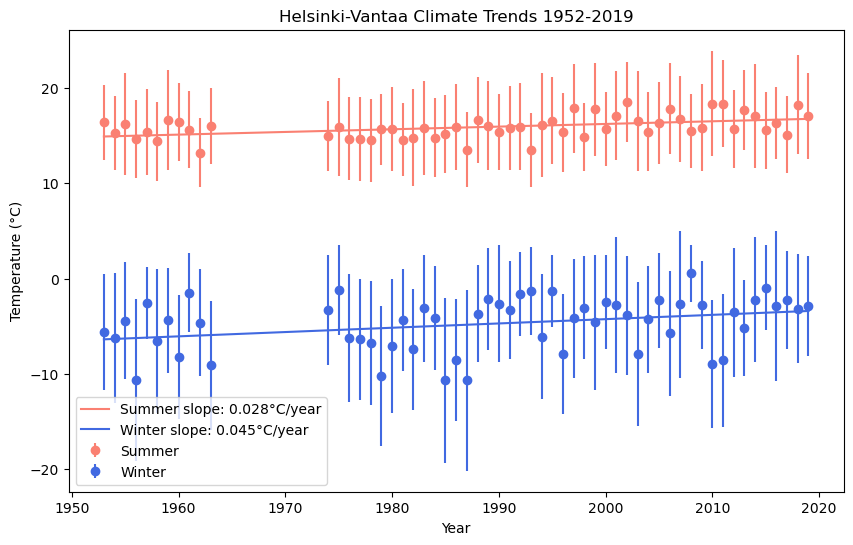

In [9]:
# Plot for all years goes here

ax = None

# YOUR CODE HERE
import matplotlib.pyplot as plt
# Define colors for the seasons
summer_color = 'salmon'
winter_color = 'royalblue'
# Plot for all years
plt.figure(figsize=(10, 6))
plt.errorbar(data['Year'], data['Summer mean'], yerr=data['Summer std'], fmt='o', color=summer_color, label='Summer')
plt.errorbar(data['Year'], data['Winter mean'], yerr=data['Winter std'], fmt='o', color=winter_color, label='Winter')
# Calculate the regression line values
years_extended = np.linspace(data['Year'].min(), data['Year'].max(), 100)
summer_trend = A_summer + B_summer * years_extended
winter_trend = A_winter + B_winter * years_extended
# Plot the regression lines
plt.plot(years_extended, summer_trend, color=summer_color, label=f'Summer slope: {B_summer:.3f}°C/year')
plt.plot(years_extended, winter_trend, color=winter_color, label=f'Winter slope: {B_winter:.3f}°C/year')
# Add labels, title, legend
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Helsinki-Vantaa Climate Trends 1952-2019')
plt.legend()
# Show the plot
plt.show()
#raise NotImplementedError()

**Figure Caption:** Long-term climate trends at Helsinki-Vantaa from 1952 to 2019. The scatter plot displays the mean seasonal temperatures with error bars representing the standard deviation for each year. The linear trendlines indicate a gradual increase in both summer (red) and winter (blue) mean temperatures over the 67-year period, with winter temperatures increasing at a slightly higher rate than summer temperatures.

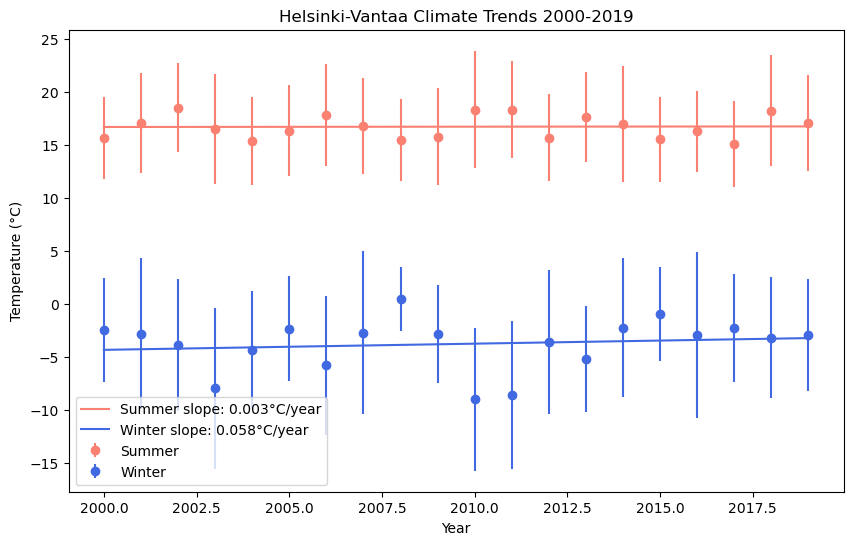

In [11]:
# Plot for last 20 years goes here

ax2 = None

# YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.errorbar(recent_years, recent_summer_means, yerr=data_2000_onwards['Summer std'], fmt='o', color=summer_color, label='Summer')
plt.errorbar(recent_years, recent_winter_means, yerr=data_2000_onwards['Winter std'], fmt='o', color=winter_color, label='Winter')
# Calculate the regression line values for the last 20 years
summer_trend_20 = A_summer20 + B_summer20 * recent_years
winter_trend_20 = A_winter20 + B_winter20 * recent_years
# Plot the regression lines for the last 20 years
plt.plot(recent_years, summer_trend_20, color=summer_color, label=f'Summer slope: {B_summer20:.3f}°C/year')
plt.plot(recent_years, winter_trend_20, color=winter_color, label=f'Winter slope: {B_winter20:.3f}°C/year')
# Add labels, title, legend
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Helsinki-Vantaa Climate Trends 2000-2019')
plt.legend()
# Show the plot
plt.show()
#raise NotImplementedError()

**Figure Caption:** Short-term climate trends at Helsinki-Vantaa from 2000 to 2019. This scatter plot focuses on the last two decades, showing the mean seasonal temperatures along with their standard deviations. The trendlines suggest a continuing rise in winter temperatures, with a more pronounced rate of increase compared to the overall period. Summer temperatures show a marginal increase, highlighted by the shallower slope of the trendline.

## Problem 2 - Linear correlation: Is a line a good fit for our data? (6 points)

In Problem 1 we used least squares regressions to calculate lines that best fit our data. One thing we did not consider, however, was whether a line was a suitable model for our data. To consider this another way, we could ask ourselves how well do our data plot on a line? This question will be the focus of Problem 2, where we will calculate the linear correlation coefficient $r$ to explore how well our data fall on a line. Notably, in doing this we will *not* consider the standard deviations in our seasonal temperatures, only the mean values for the different seasons.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Properly converting the linear correlation coefficient formula to a Python function and adding it to your `introqg_functions.py` script file.
- Calculating linear corelation coefficients for summer and winter and for the two different time periods
- Plotting your results
- Including comments that explain what most lines in the code do
- Uploading your notebook and modified script file to your GitHub repository for this week's exercise

### Part 1: A correlation coefficient function (1.5 points)

As we have seen in this week's lesson, the correlation coefficient $r$ can be used to determine how well two variables are linearly correlated with one another. In other words, how well does a line relate the two. Mathematically, we can define the correlation coefficient $r$ as

\begin{equation}
  \Large
  r = \frac{\sum{\left(x_{i} - \bar{x} \right)\left(y_{i} - \bar{y} \right)}}{\sqrt{\sum{\left(x_{i} - \bar{x} \right)^2} \sum{\left(y_{i} - \bar{y} \right)^2}}},
\end{equation}

where $x_{i}$ is the $i$th value along the $x$-axis, $\bar{x}$ is the mean of the values on the $x$-axis, and similarly for the values of $y$.

Your task in this part of the problem is to make a function for calculating $r$.

- Create a function `pearson()` in your `introqg_functions.py` script file that returns the correlation coefficient $r$ between two variables `x` and `y`

In [12]:
# Import your new function below using the format "from introqg_functions import pearson"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
from introqg_functions import pearson
#raise NotImplementedError()

In [13]:
# These visible tests with fake data should work
from nose.tools import ok_, assert_equal

# Fake data for pearson tests
x1 = np.array([1.0, 2.0, 3.0])
y1 = np.array([1.0, 2.0, 2.1])
x2 = np.array([1.0, 2.0, 2.5, 3.6, 4.2, 5.9])
y2 = np.array([5.7, 4.2, 3.6, 5.4, 2.0, 1.0])

# Fake correlation coefficients
r1 = pearson(x1, y1)
r2 = pearson(x2, y2)

# Print results
print(f"Correlation coefficient for dataset 1: {r1:.4f}.")
print(f"Correlation coefficient for dataset 2: {r2:.4f}.")

# Check that the pearson function works
assert_equal(round(r1, 4), 0.9042)
assert_equal(round(r2, 4), -0.8156)

Correlation coefficient for dataset 1: 0.9042.
Correlation coefficient for dataset 2: -0.8156.


### Part 2: Calculating correlation coefficients (1.5 points)

Next, we can calculate the correlation coefficients for our weather data.

- Calculate correlation coefficients for the summer and winter and for both time ranges (the entire range of years, and 2000-2019) using your `pearson()` function.
You should name these values as follows:
    - Entire range of years: `r_winter` for winter and `r_summer` for summer
    - Last 20 years: `r_winter20` for winter, `r_summer20` for summer

In [14]:
r_winter = None
r_summer = None
r_winter20 = None
r_summer20 = None

# YOUR CODE HERE
r_winter = pearson(years, winter_means)
# Correlation coefficient for entire range of years for summer
r_summer = pearson(years, summer_means)
# Correlation coefficient for the last 20 years for winter
r_winter20 = pearson(recent_years, recent_winter_means)
# Correlation coefficient for the last 20 years for summer
r_summer20 = pearson(recent_years, recent_summer_means)
#raise NotImplementedError()

In [15]:
# This test should work
print(f"Your winter (all years) correlation coefficient: {r_winter:.4f}. Expected value: 0.3145.")


Your winter (all years) correlation coefficient: 0.3145. Expected value: 0.3145.


In [16]:
# This test should work
print(f"Your summer (last 20 years) correlation coefficient: {r_summer20:.4f}. Expected value: 0.0148.")


Your summer (last 20 years) correlation coefficient: 0.0148. Expected value: 0.0148.


### Part 3: Plotting your results, round 2 (3 points)

Now we can generate a pair of plots showing the data along with the calculated $r$ values.

- Create 2 plots of the seasonal temperature data: (**1**) one for the entire time covered in the data and (**2**) another for the last 20 years of data
    - Plot the seasonal average temperature data as a Pandas scatter plot **without** error bars for the standard deviation in seasonal temperature
    - Also include the regression lines for each season from Problem 1 to compare to the yearly temperature data. You may want to consult [the hints for this week's exercise](https://introqg-site.readthedocs.io/en/latest/lessons/L2/exercise-2.html) about how to plot the regression lines.
    - Plot the temperature data for both seasons on the same plot, using a warm color (e.g., red) for summer and a cool color (e.g., blue) for winter. You can find some convenient color names you can use in the [Matplotlib documentation online](https://matplotlib.org/stable/gallery/color/named_colors.html).
    - Be sure to set the figure size to be slightly larger, as was done in Exercise 1
- Include axis labels, a title and a legend for each plot, as well as text displaying the correlation coefficients for both the summer and winter seasons
    - If your plot legend is empty, be sure that you have a label included for the scatter plot for each season with the text name of that season
- Add figure captions in the Markdown cell below each Python cell for your plots that describe the plots as if they were in a scientific journal article

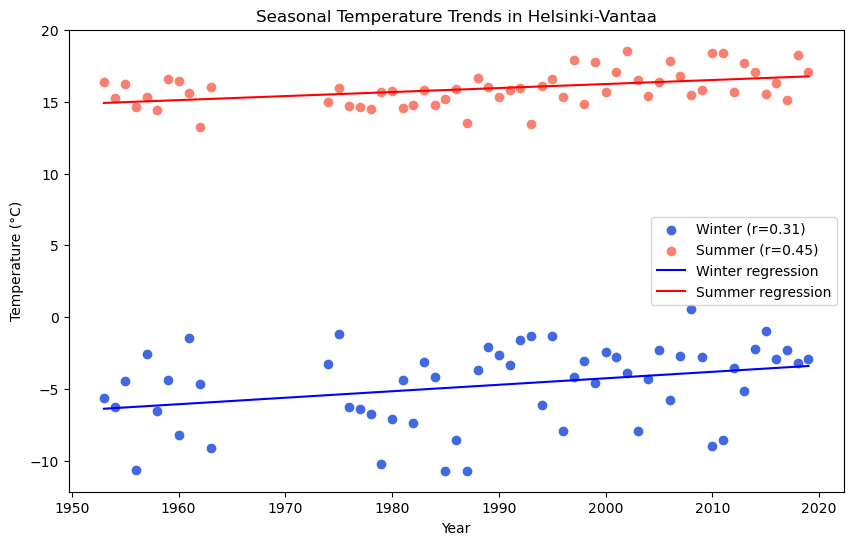

In [17]:
# Plot for all years goes here

ax3 = None

# YOUR CODE HERE
# Define x-axis data years for the entire dataset
x_all_years = data['Year']
# Define y-axis data for winter and summer for the entire dataset
y_winter_all = data['Winter mean']
y_summer_all = data['Summer mean']
# Calculate the y-values of the regression lines for the entire dataset
y_winter_reg_all = A_winter + B_winter * x_all_years
y_summer_reg_all = A_summer + B_summer * x_all_years
# Plot for all years
fig, ax3 = plt.subplots(figsize=(10, 6))
# Scatter plot for winter and summer
ax3.scatter(x_all_years, y_winter_all, label=f'Winter (r={r_winter:.2f})', color='royalblue')
ax3.scatter(x_all_years, y_summer_all, label=f'Summer (r={r_summer:.2f})', color='salmon')
# Regression lines for winter and summer
ax3.plot(x_all_years, y_winter_reg_all, color='blue', label='Winter regression')
ax3.plot(x_all_years, y_summer_reg_all, color='red', label='Summer regression')
# Set labels and title
ax3.set_xlabel('Year')
ax3.set_ylabel('Temperature (°C)')
ax3.set_title('Seasonal Temperature Trends in Helsinki-Vantaa')
# Add legend
ax3.legend()
# Show plot
plt.show()
#raise NotImplementedError()

**Figure Caption:** The scatter plot displays the seasonal temperature trends in Helsinki-Vantaa from 1952 to 2019. Each point represents the mean seasonal temperature for winter (blue) and summer (red), with the lines representing the linear regression trend for each season. The correlation coefficients for winter (r=0.31) and summer (r=0.45) suggest moderate positive linear relationships between the years and temperatures for both seasons, with summer temperatures showing a slightly stronger correlation.

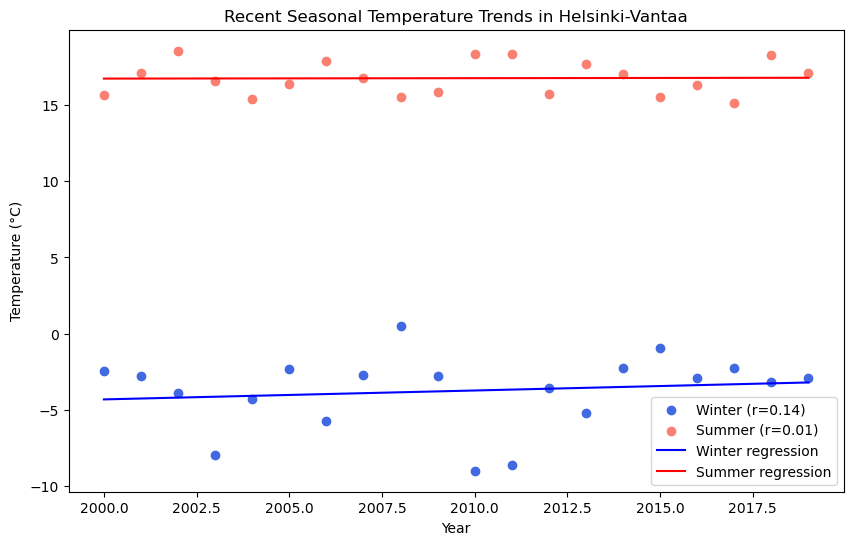

In [18]:
# Plot for the last 20 years goes here

ax4 = None

# YOUR CODE HERE
# Define x-axis data (years) for the recent dataset
x_recent_years = recent_years
# Define y-axis data for winter and summer for the recent dataset
y_winter_recent = recent_winter_means
y_summer_recent = recent_summer_means
# Calculate the y-values of the regression lines for the recent dataset
y_winter_reg_recent = A_winter20 + B_winter20 * x_recent_years
y_summer_reg_recent = A_summer20 + B_summer20 * x_recent_years
# Plot for the last ~20 years
fig, ax4 = plt.subplots(figsize=(10, 6))
# Scatter plot for winter and summer
ax4.scatter(x_recent_years, y_winter_recent, label=f'Winter (r={r_winter20:.2f})', color='royalblue')
ax4.scatter(x_recent_years, y_summer_recent, label=f'Summer (r={r_summer20:.2f})', color='salmon')
# Regression lines for winter and summer
ax4.plot(x_recent_years, y_winter_reg_recent, color='blue', label='Winter regression')
ax4.plot(x_recent_years, y_summer_reg_recent, color='red', label='Summer regression')
# Set labels and title
ax4.set_xlabel('Year')
ax4.set_ylabel('Temperature (°C)')
ax4.set_title('Recent Seasonal Temperature Trends in Helsinki-Vantaa')
# Add legend
ax4.legend()
# Show plot
plt.show()
#raise NotImplementedError()

**Figure Caption:** This scatter plot illustrates the recent seasonal temperature trends in Helsinki-Vantaa from 2000 to 2019. The mean temperatures for each season are depicted with winter in blue and summer in red. The corresponding regression lines indicate the trend of temperatures over the last two decades. The correlation coefficients for winter (r=0.14) and summer (r=0.01) indicate a weak positive linear relationship for winter and no linear relationship for summer, suggesting that over the past 20 years, winter temperatures have a slight upward trend, while summer temperatures do not show a significant trend.

## Problem 3: Calculating a goodness-of-fit (3.5 points)

The final part of the exercise this week is to calculate a goodness-of-fit for the lines fit to the data in Problem 1. The idea here is to consider that we have an expected value of the temperature based on our least-squares regressions, and we can see how well those expected values fit within the standard deviation of the seasonal temperatures.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Properly converting the goodness-of-fit formula to a Python function and adding that function to your `introqg_functions.py` script file
- Calculating goodness-of-fit values for summer and winter and for the two different time periods
- Including comments that explain what most lines in the code do
- Uploading your notebook and modified script file to your GitHub repository for this week's exercise

### Part 1: A goodness-of-fit function (1.5 points)

We can start by creating a function to calculate the goodness-of-fit. For this, you can use the reduced chi-squared equation,

\begin{equation}
  \Large
  \chi^{2} = \frac{1}{N} \sum \frac{(O_{i} - E_{i})^{2}}{\sigma_{i}^2}
\end{equation}

where $N$ is the number of ages, $O_{i}$ is the $i$th observed value, $E_{i}$ is the $i$th expected value, and $\sigma_{i}$ is the $i$th standard deviation.

For this part you should:

- Create a function called `chi_squared` in your `introqg_functions.py` script file that can be used to calculate the reduced chi-squared value

In [19]:
# Import your new function below using the format "from introqg_functions import chi_squared"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
from introqg_functions import chi_squared
#raise NotImplementedError()

In [20]:
# These visible tests with fake data should work
from nose.tools import ok_, assert_equal

# Fake data
obs1 = np.array([1.1, 2.9, 2.6, 3.5, 5.7, 2.8])
exp1 = np.array([1.5, 2.4, 3.6, 1.5, 6.7, 2.6])
std1 = np.array([0.5, 1.4, 0.6, 1.5, 0.7, 1.0])

obs2 = np.array([1.8, 2.3, 2.2, 3.9, 5.5, 2.4])
exp2 = np.array([1.2, 2.0, 3.9, 1.7, 6.1, 2.9])
std2 = np.array([0.2, 0.4, 1.6, 2.5, 0.5, 0.3])

# Fake goodness-of-fit values
cs1 = chi_squared(obs1, exp1, std1)
cs2 = chi_squared(obs2, exp2, std2)

# Print results
print(f"Goodness-of-fit for dataset 1: {cs1:.4f}.")
print(f"Goodness-of-fit for dataset 2: {cs2:.4f}.")

# Check that the chi-squared function works
assert_equal(round(cs1, 4), 1.2340)
assert_equal(round(cs2, 4), 2.6139)

Goodness-of-fit for dataset 1: 1.2340.
Goodness-of-fit for dataset 2: 2.6139.


### Part 2: Calculating goodness-of-fit (2 points)

Next, we can calculate the goodness-of-fit for each point along our line and the corresponding observed seasonal mean temperaure. We will do this by first creating arrays of expected temperature values for each season and time period, and then calculating the goodness-of-fit between those expected values and the observed temperatures.

- Create 4 arrays that contain the expected temperature value for each year based on the equation for the regression lines calculated in Problem 1
    - The variables `exp_winter` and `exp_summer` can be used for all years, while `exp_winter20` and `exp_summer20` can be used for the last 20 years
- Calculate the goodness-of-fit between the expected values and the observed mean seasonal temperatures
    - The variables `gof_winter` and `gof_summer` can be used for all years, while `gof_winter20` and `gof_summer20` can be used for the last 20 years

In [21]:
# Expected temperatures based on least-squares regression in Problem 1
exp_winter = None
exp_summer = None
exp_winter20 = None
exp_summer20 = None

# Goodness-of-fit values
gof_winter = None
gof_summer = None
gof_winter20 = None
gof_summer20 = None

# YOUR CODE HERE
# Calculate expected temperatures for all years
years = data['Year'].values
winter_means = data['Winter mean'].values
winter_stds = data['Winter std'].values
summer_means = data['Summer mean'].values
summer_stds = data['Summer std'].values
exp_winter = A_winter + B_winter * years
exp_summer = A_summer + B_summer * years
# Calculate expected temperatures for the last 20 years
exp_winter20 = A_winter20 + B_winter20 * recent_years
exp_summer20 = A_summer20 + B_summer20 * recent_years
# Goodness-of-fit values for all years
gof_winter = chi_squared(winter_means, exp_winter, winter_stds)
gof_summer = chi_squared(summer_means, exp_summer, summer_stds)
# Goodness-of-fit values for the last 20 years
gof_winter20 = chi_squared(recent_winter_means, exp_winter20, winter_stds[years >= 2000])
gof_summer20 = chi_squared(recent_summer_means, exp_summer20, summer_stds[years >= 2000])
#raise NotImplementedError()

In [22]:
# This test should work
print(f"My mean expected winter temperature: {mean(exp_winter):.4f}. Expected value: -4.7524.")


My mean expected winter temperature: -4.7524. Expected value: -4.7524.


In [23]:
# This test should work
print(f"My summer (all years) goodness-of-fit: {gof_summer:.4f}. Expected value: 0.0653.")


My summer (all years) goodness-of-fit: 0.0653. Expected value: 0.0653.


In [24]:
# Run this cell to print all of your calculated goodness-of-fit values
print(f"My winter goodness-of-fit values:\n    All years:     {gof_winter:.4f}\n    Last 20 years: {gof_winter20:.4f}\n")
print(f"My summer goodness-of-fit values:\n    All years:     {gof_summer:.4f}\n    Last 20 years: {gof_summer20:.4f}")

My winter goodness-of-fit values:
    All years:     0.2292
    Last 20 years: 0.2208

My summer goodness-of-fit values:
    All years:     0.0653
    Last 20 years: 0.0634


## Summary questions for Exercise 2 (2 points; 0.5 points each)

Answer the questions below in a few sentences.

1. Based on the least-squares regressions calculated in Problem 1, how have summer and winter temperatures changed in Helsinki over the time 1953-2019? Is the trend similar for both seasons? What about when you consider only the data over the last 20 years? Do you have any first-hand experience that relates to these temperature trends? If so, what?
2. Based on the calculation of the correlation coefficients in Problem 2, how well does it seem the data are fit by a line? Are there any significant differences between seasons or time periods in the calculated $r$ values?
3. Looking at the goodness-of-fit values calculated in Problem 3, how well does it appear the data are fit by a regression line? Do you see differences between seasons ot time period considered? 
4. Comparing the calculated $\chi^{2}$ values from Problem 3 to the $r$ values in Problem 2, what differences do you see in the numbers between seasons and/or time periods? Can you think of reasons why the $r$ and $\chi^{2}$ values might differ in terms of their relative values in each season/time period? How are the $r$ and $\chi^{2}$ values different in terms of what they measure?

1. From the least-squares regressions for 1953-2019, winter temperatures in Helsinki show a positive trend, indicating a gradual increase over the years. Summer temperatures also show a rising trend, but it's less steep than for winter temperatures. When considering the last 20 years, the winter temperature trend shows a sharper increase. This accelerated warming in recent years is consistent with broader observations of climate change. Personally, I have noticed milder winters and less snow in recent years, which aligns with this data.

2. The correlation coefficients indicate that there is a positive correlation for both seasons, but the strength of this relationship varies. For winter temperatures over all the years observed an r-value of 0.3145 suggests a moderate positive correlation. This indicates that there is a somewhat consistent linear relationship between time and winter temperatures, as time progresses winter temperatures also tend to increase to some extent. For summer temperatures over the last 20 years, an r-value of 0.0148 indicates a very weak positive correlation. This suggests that there is hardly any linear relationship between time and summer temperatures during this period, implying that the summer temperatures have not consistently increased or decreased with time over these two decades.

3. The goodness-of-fit values suggest that the regression line fits the winter data reasonably well in general for both the full period and the last 20 years although it's not a perfect fit, the goodness-of-fit values for all years are slightly higher than last 20 years. For winter temperatures over the entire observation period, the goodness-of-fit value is 0.2292, while for the last 20 years it is slightly lower at 0.2208. This suggests that the regression line is a better fit for the more recent winter data compared to the entire period, although the difference is not substantial. This could indicate that the variability in winter temperatures may have decreased slightly in the last 20 years or that the trend line is capturing the changes in winter temperatures slightly better in this more recent period. For summer temperatures, the goodness-of-fit values are quite low (0.0653 for all years and 0.0634 for the last 20 years), which indicates that the regression line is a good fit for the data in both time periods. The small decrease in the goodness-of-fit value in the last 20 years suggests that the regression line fits the more recent summer temperature data slightly better than it does for the entire observation period.

4. The $\chi^{2}$ values are generally higher for winter than for summer, indicating a better fit for winter data. The difference between $\chi^{2}$ and $r$ values in each season/time period might be due to the fact that $r$ measures the strength and direction of a linear relationship, while $\chi^{2}$ assesses how well the observed outcomes are predicted by the model, taking into account the variability of the data. The $r$ value will not change based on the scale of the data, but $\chi^{2}$ will might change as it is influenced by the magnitude of the deviations and the precision of the measurements represents by the standard deviations. Also, extreme values or outliers will affect the $\chi^{2}$ more significantly because it is based on squared differences. The $r$ value that being a measure of linear correlation is less influenced by single outliers, although it can still be affected if there are enough of them or if they are extreme enough.
